# Bibliotecas Complementares de Machine Learning e Técnicas de Validação

## 🎯 Objetivo da Aula:

- Revisar bibliotecas já conhecidas (PyTorch, Scikit-learn)
- Introduzir novas ferramentas como **TensorFlow**, **Keras**, **spaCy**, **Gensim**, **XGBoost**, **LightGBM** e **Statsmodels**
- Entender as diferenças entre **frameworks**
- Apresentar exemplos práticos de uso
- Explorar **técnicas de validação** para avaliação de modelos

## 📚 Recapitulação


### 🔹 Scikit-learn

- Biblioteca mais popular para machine learning tradicional em Python.
- Oferece algoritmos como `Regressão Linear`, `Árvores de Decisão`, `KNN`, `SVM`, entre outros.
- Fácil de usar, ideal para iniciantes.

In [7]:
# Passo 1: Importações necessárias
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

**Resumindo**
- Importa o modelo de **Regressão Linear** do scikit-learn.
  - Ele é um algoritmo de *machine learning* usado para prever valores numéricos contínuos (ex: prever preço de casa, temperatura futura, etc).

- *Importa a função `train_test_split`.
  - Ele divide os dados em dois conjuntos:
    - **Treino:** para ensinar o modelo.
    - **Teste:** para avaliar o desempenho do modelo.

- Importa a métrica **Erro Médio Quadrático (MSE)**.
  - Mede o quão bom é o modelo. 
  - Quanto menor o valor, melhor o modelo está prevendo os dados.

In [8]:
# Passo 2: Dados simulados com mais amostras e leve ruído
np.random.seed(42)  # Para reprodutibilidade
X = np.arange(1, 11).reshape(-1, 1)           # X de 1 a 10
y = 2 * X.flatten() + np.random.normal(0, 1, size=X.shape[0])  # y = 2x + ruído


- Garantindo que os números aleatórios gerados sejam sempre os mesmos em diferentes execuções.
- Criando um array com números de 1 a 10 e transforma em uma matriz coluna (formato exigido pelo scikit-learn).
- Pega cada valor de X, multiplica por 2 (y = 2x) → relação linear.
- Adiciona um ruído aleatório (distribuição normal com média 0 e desvio padrão 1) → simula dados reais.
- Resultado final: y terá valores próximos de [2, 4, 6, ..., 20], mas com pequenas variações aleatória


**Curiosidade**:

- O número `42` é utilizado, porque é uma referência à série "O Guia do Mochileiro das Galáxias".
- Onde 42 é a "resposta para a vida, o universo e tudo mais".

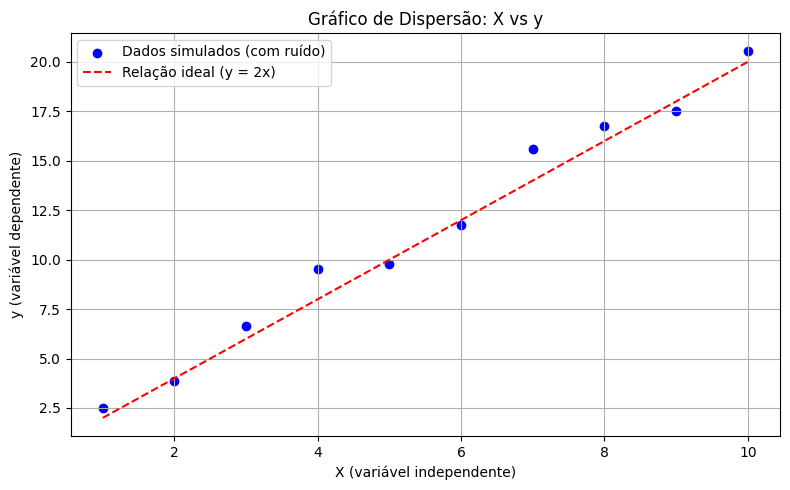

In [22]:
# Criando o gráfico de dispersão
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', label='Dados simulados (com ruído)')
plt.plot(X, 2 * X.flatten(), color='red', linestyle='--', label='Relação ideal (y = 2x)')

# Configurações do gráfico
plt.title('Gráfico de Dispersão: X vs y')
plt.xlabel('X (variável independente)')
plt.ylabel('y (variável dependente)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [11]:
print("Dados de entrada (X):")
print(X[0:5])
print("\nDados de saída (y):")
print(y[0:5])
print()

Dados de entrada (X):
[[1]
 [2]
 [3]
 [4]
 [5]]

Dados de saída (y):
[2.49671415 3.8617357  6.64768854 9.52302986 9.76584663]



In [12]:
# Passo 3: Dividindo os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
print("X_treino:", X_train.flatten())
print("y_treino:", y_train)
print("X_teste: ", X_test.flatten())
print("y_teste: ", y_test)
print()

X_treino: [ 6  1  8  3 10  5  4  7]
y_treino: [11.76586304  2.49671415 16.76743473  6.64768854 20.54256004  9.76584663
  9.52302986 15.57921282]
X_teste:  [9 2]
y_teste:  [17.53052561  3.8617357 ]



In [14]:
# Passo 4: Criando e treinando o modelo de Regressão Linear
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [15]:
# Mostrando os coeficientes da reta ajustada: y = a*x + b
print("Coeficiente angular (a):", model.coef_[0])
print("Intercepto (b):         ", model.intercept_)
print()

Coeficiente angular (a): 2.010171631599189
Intercepto (b):          0.5800997517161726



In [16]:
# Passo 5: Fazendo previsões com o modelo
y_pred = model.predict(X_test)

In [17]:
# Comparando valores reais com previstos
print("Valores reais:   ", y_test)
print("Valores previstos:", np.round(y_pred, 2))
print()

Valores reais:    [17.53052561  3.8617357 ]
Valores previstos: [18.67  4.6 ]



In [18]:
# Passo 6: Avaliação do modelo - Erro Médio Quadrático (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Erro Médio Quadrático (MSE):", round(mse, 2))
print()

Erro Médio Quadrático (MSE): 0.92



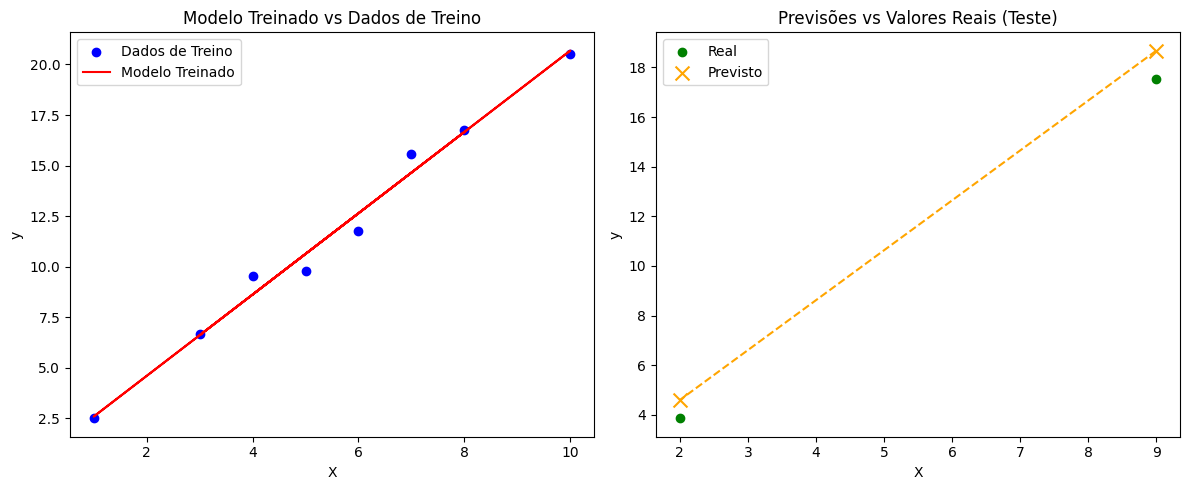

In [21]:
# Passo 7: Visualizando os resultados com gráficos
plt.figure(figsize=(12, 5))

# Gráfico 1: Dados de treino e linha da regressão
plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, color='blue', label='Dados de Treino')
plt.plot(X_train, model.predict(X_train), color='red', label='Modelo Treinado')
plt.title('Modelo Treinado vs Dados de Treino')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

# Gráfico 2: Comparando previsões com valores reais no conjunto de teste
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='green', label='Real')
plt.scatter(X_test, y_pred, color='orange', marker='x', s=100, label='Previsto')
plt.plot(X_test, y_pred, color='orange', linestyle='--')
plt.title('Previsões vs Valores Reais (Teste)')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.show()

### 🔹 PyTorch

- Framework baseado em tensores com suporte a GPU.
- Ideal para deep learning e pesquisas flexíveis.
- Permite definir redes neurais dinamicamente (define-by-run).

#### 🎯 Exemplo prático

Treinar um modelo de **regressão linear** com dados simulados, usando **PyTorch**, incluindo:
- Definição do modelo
- Função de perda (MSE)
- Otimização (SGD)
- Visualização dos resultados

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt


| Linha | O que faz | Finalidade |
|-------|-----------|------------|
| `import torch` | Importa a biblioteca **PyTorch** | Usada para modelagem de redes neurais e operações tensoriais |
| `import torch.nn as nn` | Importa o módulo de redes neurais do PyTorch | Usado para criar e definir arquiteturas de modelos (como camadas, funções de ativação etc.) |
| `import torch.optim as optim` | Importa o módulo de otimizadores do PyTorch | Usado para definir algoritmos de otimização, como SGD, Adam etc. |
| `import numpy as np` | Importa a biblioteca **NumPy** | Usada para manipulação de arrays e operações matemáticas |
| `import matplotlib.pyplot as plt` | Importa a biblioteca **Matplotlib** | Usada para visualização de gráficos (como pontos, retas, curvas etc.) |


In [4]:
# Passo 1: Dados simulados com ruído
np.random.seed(42)
X = np.arange(1, 11).reshape(-1, 1)               # X de 1 a 10
y = 2 * X.flatten() + np.random.normal(0, 1, size=X.shape[0])  # y = 2x + ruído

print("Dados de entrada (X):")
print(X[0:5])
print("\nDados de saída (y):")
print(y[0:5])

Dados de entrada (X):
[[1]
 [2]
 [3]
 [4]
 [5]]

Dados de saída (y):
[2.49671415 3.8617357  6.64768854 9.52302986 9.76584663]


In [5]:
# Passo 2: Convertendo dados para tensores do PyTorch
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)  # Garantir formato 2D

In [6]:
# Passo 3: Dividindo os dados em treino e teste
# Como estamos no PyTorch, vamos fazer manualmente
train_size = int(0.8 * len(X_tensor))
X_train, X_test = X_tensor[:train_size], X_tensor[train_size:]
y_train, y_test = y_tensor[:train_size], y_tensor[train_size:]

In [7]:
print("\nX_treino:", X_train.numpy().flatten())
print("y_treino:", y_train.numpy().flatten())
print("X_teste: ", X_test.numpy().flatten())
print("y_teste: ", y_test.numpy().flatten())


X_treino: [1. 2. 3. 4. 5. 6. 7. 8.]
y_treino: [ 2.496714   3.8617356  6.6476884  9.52303    9.765846  11.765863
 15.579213  16.767435 ]
X_teste:  [ 9. 10.]
y_teste:  [17.530525 20.54256 ]


🎯 **Dica**
- O código `X_train.numpy().flatten()` é utilizado para converter um tensor do PyTorch (X_train) em um array NumPy e, em seguida, transformá-lo de uma estrutura multidimensional (como uma matriz) em um vetor unidimensional (achatado). 
- Isso é útil principalmente para visualização ou análise de dados com bibliotecas como o `Matplotlib` ou printagens em console, que lidam melhor com arrays simples do NumPy do que com tensores do `PyTorch`. 
- Em resumo, ele facilita a exibição ou manipulação de dados durante o processo de treinamento ou avaliação de modelos de machine learning.

In [8]:
# Passo 4: Definindo o modelo de regressão linear
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(1, 1)  # Camada linear: y = a*x + b

    def forward(self, x):
        return self.linear(x)

model = LinearRegression()

In [9]:
# Passo 5: Definindo função de perda e otimizador
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

- `criterion = nn.MSELoss()`  
  -  Define a **função de perda** (ou *loss*): aqui, usamos o **Erro Médio Quadrático (MSE)**, que mede o quão longe estão as previsões do modelo em relação aos valores reais.

- `optimizer = optim.SGD(model.parameters(), lr=0.01)`  
  -  Define o **otimizador**: nesse caso, o **Gradiente Descendente Estocástico (SGD)**, responsável por ajustar os pesos do modelo para minimizar a perda. 
  - O parâmetro `lr=0.01` é a **taxa de aprendizado**, que controla o tamanho dos ajustes feitos a cada passo.

In [10]:
# Passo 6: Treinamento do modelo
epochs = 300
for epoch in range(epochs):
    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    # Backward pass e otimização
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 50 == 0:
        print(f'Época [{epoch+1}/{epochs}], Perda: {loss.item():.4f}')

Época [50/300], Perda: 0.4566
Época [100/300], Perda: 0.4523
Época [150/300], Perda: 0.4494
Época [200/300], Perda: 0.4475
Época [250/300], Perda: 0.4463
Época [300/300], Perda: 0.4454


In [11]:
# Passo 7: Fazendo previsões
model.eval()  # Desliga o modo de treino
with torch.no_grad():
    y_pred = model(X_test)

In [12]:
# Comparando valores reais com previstos
print("\nValores reais:   ", y_test.numpy().flatten())
print("Valores previstos:", y_pred.numpy().flatten())


Valores reais:    [17.530525 20.54256 ]
Valores previstos: [18.931757 21.020452]


In [13]:
# Avaliação final - Erro Médio Quadrático
mse = criterion(y_pred, y_test).item()
print("\nErro Médio Quadrático (MSE):", round(mse, 4))


Erro Médio Quadrático (MSE): 1.0959


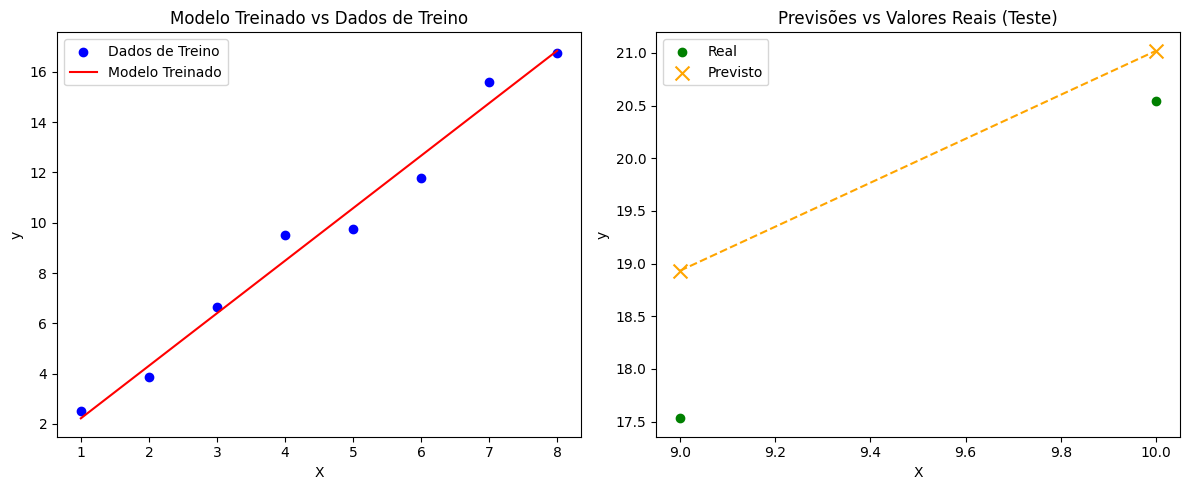

In [16]:
# Passo 8: Visualizando os resultados
plt.figure(figsize=(12, 5))

# Gráfico 1: Dados de treino e linha da regressão
plt.subplot(1, 2, 1)
plt.scatter(X_train.detach().numpy(), y_train.detach().numpy(), color='blue', label='Dados de Treino')
plt.plot(X_train.detach().numpy(), model(X_train).detach().numpy(), color='red', label='Modelo Treinado')
plt.title('Modelo Treinado vs Dados de Treino')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

# Gráfico 2: Comparando previsões com valores reais no conjunto de teste
plt.subplot(1, 2, 2)
plt.scatter(X_test.detach().numpy(), y_test.detach().numpy(), color='green', label='Real')
plt.scatter(X_test.detach().numpy(), y_pred.detach().numpy(), color='orange', marker='x', s=100, label='Previsto')
plt.plot(X_test.detach().numpy(), y_pred.detach().numpy(), color='orange', linestyle='--')
plt.title('Previsões vs Valores Reais (Teste)')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.show()

🧩 **Explicação Simplificada do Fluxo**

| Etapa | O que fizemos |
|-------|----------------|
| Dados | Simulamos dados lineares com ruído |
| Tensores | Transformamos os dados em `torch.Tensor` |
| Modelo | Criamos um modelo simples de regressão linear |
| Treino | Usamos MSE como perda e SGD como otimizador |
| Previsão | Rodamos o modelo no conjunto de teste |
| Avaliação | Calculamos o erro médio quadrático |
| Visualização | Plotamos gráficos para entender melhor o ajuste |

🚀 **Benefícios de Usar PyTorch**

- Flexibilidade para criar modelos customizados.
- Integração com GPU para aceleração.
- Base para redes neurais complexas.
- Controle total sobre o processo de aprendizado.

## 🧠 Introdução às Novas Ferramentas

### 💡 Por que conhecer diferentes frameworks?

- Cada `framework` tem suas **vantagens** e **casos de uso ideais**. 
- Saber escolher a ferramenta certa pode impactar diretamente no sucesso do projeto.

## 🧱 TensorFlow & Keras

🚨 OBS: 
- O **TensorFlow atualmente não é compatível com o Python 3.13**, incluindo a versão `3.13.2`. 
- Isso acontece porque as bibliotecas como TensorFlow exigem compilação nativa e dependências que ainda estão sendo atualizadas para suportar o Python 3.13.

| Python Version | TensorFlow Suporte? |
|----------------|---------------------|
| 3.7 – 3.11     | ✅ Sim              |
| 3.12           | ⚠️ Limitado / experimental |
| 3.13           | ❌ Não              |

### 📌 O que é o `TensorFlow`?
- Desenvolvido pelo Google.
- Um dos principais frameworks de Deep Learning.
- Baseado em gráficos computacionais estáticos (até versão 1.x) ou dinâmicos (versão 2.x).
- Excelente para produção e deployment em escala (servidores, mobile, IoT).

### 📌 O que é o `Keras`?
- API de alto nível integrada ao TensorFlow desde a versão 2.x.
- Muito mais fácil de usar que o TensorFlow puro.
- Ideal para prototipagem rápida de redes neurais.

### 🔁 Comparação: Keras vs PyTorch

| Característica         | **Keras (TensorFlow)**             | **PyTorch**                         |
|------------------------|------------------------------------|-------------------------------------|
| Estilo de programação  | Declarativo (modelo pronto)       | Imperativo (definição passo a passo)|
| Curva de aprendizado   | Mais baixa                        | Mais alta                           |
| Flexibilidade          | Menos flexível                    | Mais flexível                       |
| Uso em produção        | Excelente                         | Menos comum                         |

### ✅ Vantagens do TensorFlow/Keras na produção:

- Suporte a TFLite (mobile), TF.js (web), SavedModel, TFX (pipeline completo)
- Escalabilidade com TPUs e clusters
- Integração com plataformas como GCP, AWS, Azure

## 🛠️ Atividade Prática Guiada: Criando uma Rede Neural com Keras

**Objetivo:**
- Criar um modelo sequencial simples para prever números.

## 🧩 Bibliotecas Especializadas

### 📖 spaCy – Processamento de Linguagem Natural (PLN)

- Ideal para tarefas como **tokenização**, **lematização**, reconhecimento de entidades (NER), análise sintática.
- Rápido e eficiente para processamento de textos em larga escala.

#### 📚 Exemplo Prático:

✅ Objetivo:

- Instalar/configurar o spaCy para usar o modelo de português do Brasil .
- Utilizar modelo em português (pt_core_news_sm).
- Apresentar um código com exemplos de análise sintática e morfológica.
- Incluir outros recursos úteis como reconhecimento de entidades nomeadas (NER), lematização, etc.

📦 **Passo 1: Instale as dependências necessárias**
- Antes de executar o código, você precisa instalar os pacotes necessários no seu ambiente Python:

    ```bash
    pip install spacy
    python -m spacy download pt_core_news_sm
    ```

💻 **Passo 2: Código completo em Python**
- Agora, vamos ao código completo com explicações didáticas:

In [3]:
# Importa a biblioteca spaCy
import spacy

# Carrega o modelo de linguagem em português do Brasil
nlp = spacy.load("pt_core_news_sm")

In [6]:
# Texto de exemplo em português
texto = "A Apple está planejando comprar uma startup britânica por 1 bilhão de dólares."

In [7]:
# Processa o texto com o pipeline do spaCy
doc = nlp(texto)

In [16]:
# Exibe informações sobre cada token (palavra + contexto gramatical)
print("=== Análise Morfosintática ===")
for token in doc:
    print(f"Palavra: {token.text:15} | Classe gramatical: {token.pos_:5} | Dependência sintática: {token.dep_}")

=== Análise Morfosintática ===
Palavra: A               | Classe gramatical: DET   | Dependência sintática: det
Palavra: Apple           | Classe gramatical: PROPN | Dependência sintática: nsubj
Palavra: está            | Classe gramatical: AUX   | Dependência sintática: aux
Palavra: planejando      | Classe gramatical: VERB  | Dependência sintática: ROOT
Palavra: comprar         | Classe gramatical: VERB  | Dependência sintática: xcomp
Palavra: uma             | Classe gramatical: DET   | Dependência sintática: det
Palavra: startup         | Classe gramatical: NOUN  | Dependência sintática: obj
Palavra: britânica       | Classe gramatical: ADJ   | Dependência sintática: amod
Palavra: por             | Classe gramatical: ADP   | Dependência sintática: case
Palavra: 1               | Classe gramatical: NUM   | Dependência sintática: obl
Palavra: bilhão          | Classe gramatical: NUM   | Dependência sintática: flat
Palavra: de              | Classe gramatical: ADP   | Dependência sint

In [17]:
print("\n=== Reconhecimento de Entidades Nomeadas (NER) ===")
# Identifica e exibe entidades nomeadas (como organizações, datas, valores monetários etc.)
for entidade in doc.ents:
    print(f"Entidade: {entidade.text} | Tipo: {entidade.label_}")


=== Reconhecimento de Entidades Nomeadas (NER) ===
Entidade: Apple | Tipo: ORG


In [20]:
print("\n=== Lematização ===")
# Mostra a forma base (lema) de algumas palavras relevantes
for token in doc:
    if token.pos_ in ["VERB", "NOUN"]:  # Apenas verbos e substantivos
        print(f"Palavra: {token.text:15} | Lema: {token.lemma_}")


=== Lematização ===
Palavra: planejando      | Lema: planejar
Palavra: comprar         | Lema: comprar
Palavra: startup         | Lema: startup
Palavra: dólares         | Lema: dólar


#### 🧠 O que esse código faz?

1. **Análise Morfosintática**
    - Mostra:
        - A palavra (`token.text`)
        - Sua classe gramatical (`token.pos_`: substantivo, verbo, artigo, etc.)
        - Sua relação com outras palavras na frase (`token.dep_`: sujeito, objeto, modificador nominal etc.)

2. **Reconhecimento de Entidades Nomeadas (NER)**
    - Identifica automaticamente:
        - Organizações (`ORG`: como "Apple")
        - Locais (`GPE`: como "britânica" se referindo ao Reino Unido)
        - Valores monetários (`MONEY`: como "1 bilhão de dólares")


3. **Lematização**
    - Retorna a forma base da palavra, útil para normalização em processamento de linguagem natural.

#### 🎯 Aplicações práticas dessa técnica:

- **Extração de informações** em textos (ex: extrair empresas mencionadas em notícias)
- **Preparação de dados** para modelos de NLP (como classificação de sentimentos ou chatbots)
- **Análise de documentos** legais, médicos ou jornalísticos

### 📘 Gensim – Word Embeddings e Modelagem de Tópicos

- Usado para criar vetores de palavras (Word2Vec, Doc2Vec) e modelagem de tópicos (LDA).

🚨 Observação
- Requer bibliotecas específicas para realizar aa compilação

🚀 **Exemplo de código**:
```python
from gensim.models import Word2Vec

sentences = [["cat", "says", "meow"], ["dog", "barks"]]
model = Word2Vec(sentences, vector_size=10, window=5, min_count=1)
print(model.wv["cat"])
```

#### 🧠 1. Vetores de Palavras (Word2Vec, Doc2Vec)

**Word2Vec**:
- É uma técnica de **aprendizado não supervisionado** que converte palavras em **vetores numéricos**.
- A ideia é que palavras com significados semelhantes fiquem próximas no espaço vetorial.
- Exemplo:  
  - `vetor("rei") - vetor("homem") + vetor("mulher") ≈ vetor("rainha")`

**Doc2Vec**:
- Extensão do Word2Vec para representar **documentos inteiros** como vetores.
- Além de capturar o significado das palavras, considera o contexto geral do texto.

🎯 **Para que serve?**  
- Usado em tarefas como classificação de textos, detecção de similaridade entre frases, resumo automático, etc.

#### 🎯 2. Modelagem de Tópicos (LDA – Latent Dirichlet Allocation)

**O que é LDA?**
- É um modelo probabilístico usado para descobrir **tópicos ocultos (latentes)** em uma coleção de documentos.
- Dado um conjunto de textos, o LDA identifica grupos de palavras que frequentemente aparecem juntas — esses grupos são os "tópicos".

**Como funciona (de forma simples):**
- Cada documento é uma mistura de tópicos.
- Cada tópico é uma distribuição de palavras.
- Exemplo:
  - Tópico 1: ["futebol", "gol", "jogador", "time"]
  - Tópico 2: ["computador", "software", "programação", "dados"]

🎯 **Para que serve?**  
- Análise exploratória de textos
- Sumarização temática
- Agrupamento de documentos por assunto

#### ✅ Comparando Resumidamente

| Modelo      | Representa         | Tipo de Aprendizado | Principal Uso                     |
|-------------|--------------------|---------------------|-----------------------------------|
| Word2Vec    | Palavras como vetores | Não supervisionado   | Similaridade entre palavras       |
| Doc2Vec     | Documentos como vetores | Não supervisionado   | Classificação e busca de textos   |
| LDA         | Tópicos em documentos | Não supervisionado   | Descoberta de temas em textos     |

### 📈 XGBoost e LightGBM – Algoritmos de Gradient Boosting

- Algoritmos de **Gradient Boosting** são uma família de técnicas de **aprendizado de máquina** baseadas em combinação sequencial de modelos fracos, geralmente árvores de decisão, para **criar um modelo forte e altamente preciso**. 
- A ideia principal é **corrigir iterativamente** os erros cometidos pelos modelos anteriores, ajustando novos modelos aos resíduos (erros) das previsões anteriores, usando o gradiente descendente para minimizar uma função de perda. 
- Essa abordagem permite que o modelo aprenda com seus próprios erros de forma eficiente, resultando em alta performance em problemas de classificação e regressão. 
- Exemplos populares incluem XGBoost , LightGBM e CatBoost, amplamente usados em competições de machine learning por sua precisão e eficiência.
- Muito usados em competições Kaggle por sua performance e precisão.
- Ótimos para dados tabulares.

In [23]:
# Importações necessárias
from xgboost import XGBClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

- Este código realiza as **importações necessárias** para construir, treinar e avaliar um modelo de classificação usando o algoritmo **XGBoost** com o dataset **Iris**, um conjunto de dados clássico que contém medidas das **pétalas** e **sépalas** de flores, com 3 tipos diferentes (classes).

    - `XGBClassifier`: Modelo do XGBoost usado para classificação.
    - `load_iris`: Carrega o dataset Iris.
    - `train_test_split`: Divide os dados em conjuntos de treino e teste.
    - `StandardScaler`: Usado para normalizar (padronizar) os valores das características.
    - `accuracy_score`, `confusion_matrix`, `classification_report`: Métricas para avaliar o desempenho do modelo.
    - `seaborn` e `matplotlib.pyplot`: Bibliotecas usadas para visualização gráfica, como a matriz de confusão. 

In [24]:
# Passo 1: Carregar os dados
iris = load_iris()
X, y = iris.data, iris.target

In [26]:
# Passo 3: Padronizar os dados (importante para muitos modelos, inclusive XGBoost em certos casos)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

- O código padroniza (normaliza) as características dos dados, aplicando a padronização Z-score, ou seja, transforma as variáveis para terem média zero e desvio padrão um.

    - `scaler = StandardScaler()`: Cria uma instância do objeto que vai realizar a padronização.
    - `X_train = scaler.fit_transform(X_train)`: Ajusta o scaler aos dados de treino e em seguida transforma eles.
    - `X_test = scaler.transform(X_test)`: Aplica a mesma transformação aos dados de teste, usando as estatísticas do conjunto de treino (evitando vazamento de dados).

- O código prepara os dados numéricos para terem a mesma escala, o que ajuda muitos algoritmos de machine learning, como o XGBoost, a convergirem mais rápido e performarem melhor.

In [37]:
# Passo 4: Criar e treinar o modelo XGBoost
model = XGBClassifier(eval_metric='mlogloss', random_state=42)
model.fit(X_train, y_train)

,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'mlogloss'


- Este código **cria e treina um modelo de classificação usando o XGBoost**:

    - `model = XGBClassifier(eval_metric='mlogloss', random_state=42)`: Cria uma instância do classificador XGBoost, definindo:
        - `eval_metric='mlogloss'`: Métrica usada para avaliar o desempenho durante o treinamento (necessária para problemas multiclasse).
        - `random_state=42`: Garante reprodutibilidade dos resultados (sempre que rodar, o modelo terá o mesmo comportamento).

    - `model.fit(X_train, y_train)`:  
    Treina o modelo usando os dados de treino (`X_train`) e seus rótulos (`y_train`).

- Este trecho cria um modelo XGBoost e o ajusta aos dados de treinamento para que ele aprenda a classificar as amostras corretamente.

In [30]:
# Passo 5: Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

- Este código **faz previsões usando o modelo treinado**:

    - `y_pred = model.predict(X_test)`  
    O modelo aplica o que aprendeu durante o treinamento para prever as classes (`y_pred`) das amostras no conjunto de teste (`X_test`).

- Gera as predições do modelo XGBoost para os dados que ele **nunca viu durante o treinamento**, permitindo avaliar seu desempenho.

In [ ]:
# Passo 6: Avaliar o desempenho do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo no conjunto de teste: {accuracy:.2f}')

Acurácia do modelo no conjunto de teste: 1.00


- Este código **avalia a acurácia do modelo** nas previsões feitas no conjunto de teste:

    - `accuracy = accuracy_score(y_test, y_pred)`  
    Calcula a porcentagem de previsões corretas comparando os rótulos reais (`y_test`) com as previsões do modelo (`y_pred`).

- Mede e exibe o percentual de amostras que o modelo classificou corretamente.

In [32]:
# Relatório de classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))


Relatório de Classificação:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



- Este trecho **gera e exibe um relatório de classificação** que mostra métricas de desempenho do modelo para cada classe:

    - `classification_report(y_test, y_pred, target_names=iris.target_names)`  
    Gera um relatório com as métricas **precisão**, **recall**, **f1-score** e **suporte** para cada classe.

- **O que significa cada parte?**

    - **precision**: Proporção de previsões positivas que estão corretas.
    - **recall**: Proporção de amostras positivas que foram corretamente identificadas.
    - **f1-score**: Média harmônica entre precisão e recall.
    - **support**: Número de amostras reais para cada classe.
    - **accuracy**: Acurácia geral do modelo.
    - **macro avg / weighted avg**: Médias das métricas entre todas as classes.

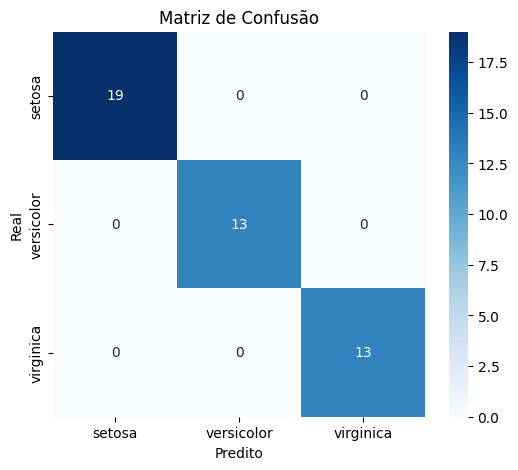

In [33]:
# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

### 📌 Explicação Didática:

- **`load_iris()`**: Carrega um dataset clássico com medidas de pétalas e sépalas de flores Iris, com 3 classes.
- **`train_test_split()`**: Separa os dados em treino e teste para avaliar o desempenho do modelo corretamente.
- **`StandardScaler()`**: Normaliza as features para média zero e variância unitária — opcional, mas recomendado.
- **`XGBClassifier()`**: Modelo baseado em árvores para classificação multiclasse.
- **`accuracy_score`**: Mede a porcentagem de acertos do modelo.
- **`classification_report`**: Mostra métricas como precisão, recall e F1-score por classe.
- **`confusion_matrix` + `seaborn`**: Visualiza onde o modelo errou ou acertou.


> Nota: Como o dataset Iris é pequeno e bem comportado, é comum obter resultados muito bons.

## 📝 Resumo Final



| Biblioteca      | Tipo de Tarefa                     | Principais Vantagens                          |
|----------------|------------------------------------|------------------------------------------------|
| Scikit-learn   | Machine Learning tradicional       | Simples, rápido, muitos algoritmos             |
| PyTorch        | Deep Learning                      | Flexível, ótimo para pesquisa                  |
| TensorFlow     | Deep Learning                      | Produção, escalabilidade, integração ampla     |
| Keras          | Abstração de alto nível            | Fácil de usar, rápido para prototipar          |
| spaCy          | PLN                                | Eficiente, rico em funcionalidades             |
| Gensim         | Embeddings e modelagem de tópicos  | Foco em NLP sem supervisão                     |
| XGBoost        | Boosting (dados tabulares)         | Alta performance                               |
| LightGBM       | Boosting (mais rápido que XGBoost) | Velocidade e eficiência                        |
| Statsmodels    | Análise estatística                | Inferência estatística detalhada               |